In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(42)


In [8]:
class TwoNeuronSystem:
    def __init__(self, learning_rate=0.01, initial_weight=0.2):
        # Initialize connection weight between neurons
        self.weight = initial_weight
        self.learning_rate = learning_rate
        
        # Store history for visualization
        self.weight_history = [initial_weight]
        self.activity_correlation_history = []
# Explanation: 
# Defines a class to encapsulate the two-neuron system __init__ is the constructor that initializes the class when an object is created
# Sets the initial connection weight between neurons to the provided value (default 0.2)
# Sets the learning rate that controls how quickly weights change (default 0.01)
# Creates a list to track weight changes over time, starting with the initial weight
# Creates an empty list to track correlation between neuron activities
        
    def simulate(self, num_timesteps=1000, correlation=0.8):
        """
        Simulate the two-neuron system with correlated/uncorrelated inputs.
        
        Args:
            num_timesteps: Number of simulation steps
            correlation: Correlation between neuron activities (-1 to 1)
        """
# Explanation: 
# Defines a method to run the simulation
# Takes parameters for number of time steps and desired correlation between neurons

        # Storage for neuron activities
        neuron1_activities = np.zeros(num_timesteps)
        neuron2_activities = np.zeros(num_timesteps)
# Explanation: 
# Creates arrays to store the activity values of both neurons at each time step
# Initializes them with zeros

        # Generate correlated activities
        mean = [0, 0]
        cov = [[1, correlation], [correlation, 1]]
        activities = np.random.multivariate_normal(mean, cov, num_timesteps)
# Explanation:
# Sets up parameters for generating correlated random activities
# mean = [0, 0] specifies that both neurons have a mean activity of 0
# cov is the covariance matrix that determines the correlation:
    # Diagonal values (1) represent variance of each neuron
    # Off-diagonal values (correlation) control how coordinated the neurons are
#Generates random values from a multivariate normal distribution with specified correlation

        # Apply sigmoid to constrain activities between 0 and 1
        neuron1_activities = 1 / (1 + np.exp(-activities[:, 0]))
        neuron2_activities = 1 / (1 + np.exp(-activities[:, 1]))
        
        # Hebbian learning: "Neurons that fire together, wire together"
        for t in range(num_timesteps):
            # Current activities
            a1 = neuron1_activities[t]
            a2 = neuron2_activities[t]
            
            # Calculate correlation for history
            if t > 0:
                recent_corr = np.corrcoef(neuron1_activities[max(0, t-100):t+1], 
                                         neuron2_activities[max(0, t-100):t+1])[0, 1]
                self.activity_correlation_history.append(recent_corr)
            
            # Apply Hebbian learning rule (weight change proportional to product of activities)
            delta_w = self.learning_rate * a1 * a2
            self.weight += delta_w
            
            # Optional: Weight normalization to prevent unbounded growth
            self.weight = np.clip(self.weight, 0, 2)
            
            # Store weight history
            self.weight_history.append(self.weight)
            
        return neuron1_activities, neuron2_activities
    
    def plot_results(self):
        """Plot the simulation results."""
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
        
        # Plot connection weight over time
        ax1.plot(self.weight_history, 'b-')
        ax1.set_title('Connection Weight Evolution')
        ax1.set_xlabel('Time Step')
        ax1.set_ylabel('Weight')
        ax1.grid(True)
        
        # Plot correlation history
        ax2.plot(self.activity_correlation_history, 'r-')
        ax2.set_title('Activity Correlation')
        ax2.set_xlabel('Time Step')
        ax2.set_ylabel('Correlation')
        ax2.set_ylim(-1.1, 1.1)
        ax2.grid(True)
        
        # Visualize neurons and connections
        ax3.axis('off')
        ax3.set_title('Two-Neuron System')
        circle1 = plt.Circle((0.3, 0.5), 0.2, color='lightblue', alpha=0.7)
        circle2 = plt.Circle((0.7, 0.5), 0.2, color='lightblue', alpha=0.7)
        ax3.add_patch(circle1)
        ax3.add_patch(circle2)
        
        # Draw arrow for connection
        arrow_width = self.weight_history[-1] * 0.05
        arrow = ax3.arrow(0.5, 0.5, 0, 0, head_width=0.05, 
                          head_length=0.05, fc='black', ec='black',
                          width=arrow_width)
        
        ax3.text(0.3, 0.5, 'N1', ha='center', va='center')
        ax3.text(0.7, 0.5, 'N2', ha='center', va='center')
        ax3.text(0.5, 0.7, f'w = {self.weight_history[-1]:.2f}', ha='center')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_dynamic_system(self):
        """Create an animation showing the changing connection strength."""
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')
        ax.set_title('Two-Neuron System with Changing Connection Strength')
        
        # Create the neurons
        circle1 = plt.Circle((0.3, 0.5), 0.2, color='lightblue', alpha=0.7)
        circle2 = plt.Circle((0.7, 0.5), 0.2, color='lightblue', alpha=0.7)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        
        # Add neuron labels
        ax.text(0.3, 0.5, 'N1', ha='center', va='center')
        ax.text(0.7, 0.5, 'N2', ha='center', va='center')
        
        # Initial weight text
        weight_text = ax.text(0.5, 0.8, f'Weight: {self.weight_history[0]:.2f}', ha='center')
        step_text = ax.text(0.5, 0.9, f'Step: 0', ha='center')
        
        # Initial arrow for connection
        arrow = ax.arrow(0.5, 0.5, 0, 0, head_width=0.05, 
                         head_length=0.05, fc='black', ec='black',
                         width=self.weight_history[0] * 0.05)
        
        def update(frame):
            # Update the weight text
            weight_text.set_text(f'Weight: {self.weight_history[frame]:.2f}')
            step_text.set_text(f'Step: {frame}')
            
            # Remove old arrow and create a new one
            if 'arrow' in locals():
                arrow.remove()
            
            # Scale arrow width with weight
            arrow_width = self.weight_history[frame] * 0.05
            new_arrow = ax.arrow(0.4, 0.5, 0.2, 0, head_width=0.05, 
                              head_length=0.05, fc='black', ec='black',
                              width=arrow_width)
            
            return weight_text, step_text, new_arrow
        
        # Create animation (showing fewer frames for performance)
        ani = FuncAnimation(fig, update, frames=range(0, len(self.weight_history), 10),
                            blit=True, repeat=False)
        
        plt.tight_layout()
        plt.show()

Simulation 1: Positively Correlated Neurons


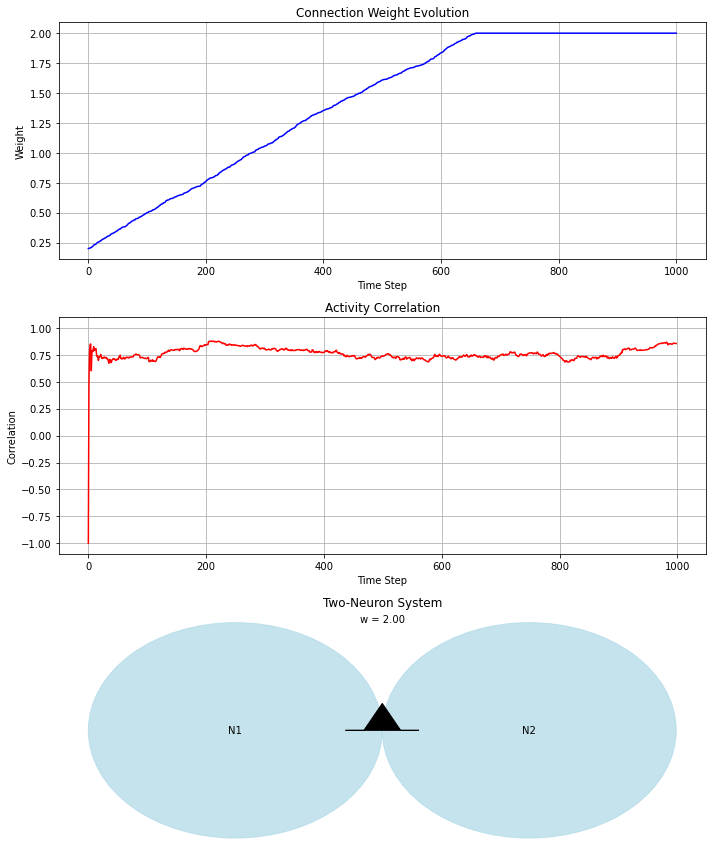


Simulation 2: Uncorrelated Neurons


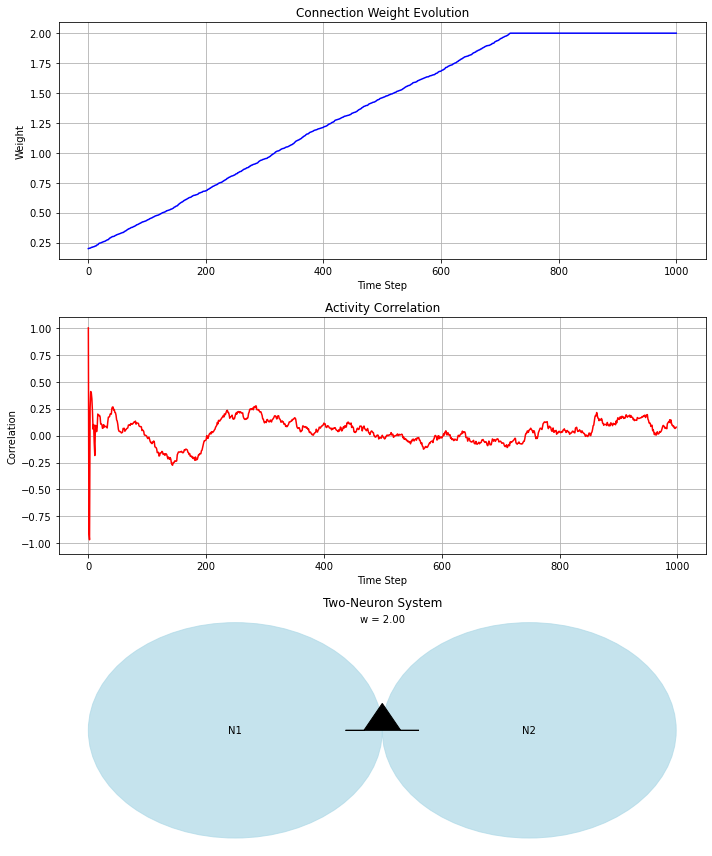


Simulation 3: Negatively Correlated Neurons


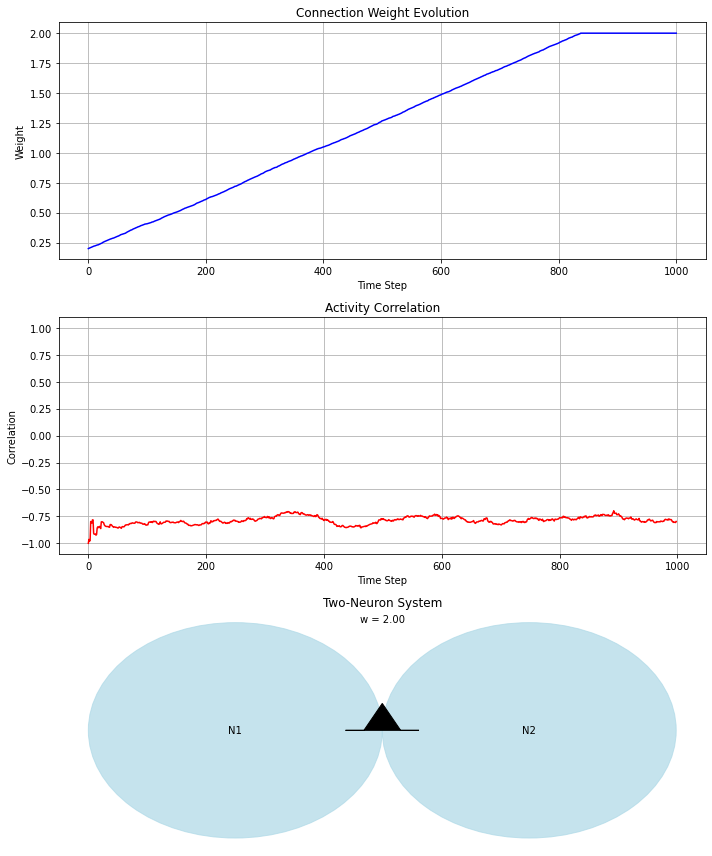

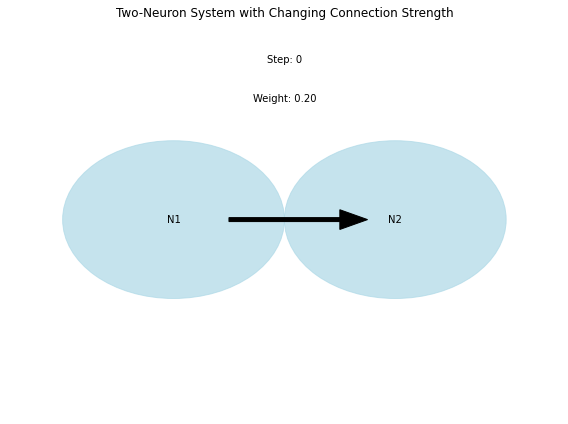

In [9]:
# Run simulations with different correlations
def run_demonstration():
    # 1. Positively correlated activity
    print("Simulation 1: Positively Correlated Neurons")
    positive_sys = TwoNeuronSystem(learning_rate=0.01, initial_weight=0.2)
    positive_sys.simulate(num_timesteps=1000, correlation=0.8)
    positive_sys.plot_results()
    
    # 2. Uncorrelated activity
    print("\nSimulation 2: Uncorrelated Neurons")
    uncorrelated_sys = TwoNeuronSystem(learning_rate=0.01, initial_weight=0.2)
    uncorrelated_sys.simulate(num_timesteps=1000, correlation=0.0)
    uncorrelated_sys.plot_results()
    
    # 3. Negatively correlated activity
    print("\nSimulation 3: Negatively Correlated Neurons")
    negative_sys = TwoNeuronSystem(learning_rate=0.01, initial_weight=0.2)
    negative_sys.simulate(num_timesteps=1000, correlation=-0.8)
    negative_sys.plot_results()
    
    return positive_sys, uncorrelated_sys, negative_sys

if __name__ == "__main__":
    positive_sys, uncorrelated_sys, negative_sys = run_demonstration()
    
    # Optional: Show animation for positive correlation
    positive_sys.visualize_dynamic_system()